  <div class="alert alert-info">
  Привет, Александра! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

  <div class="alert alert-success">
  <b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
  </div>
  <div class="alert alert-warning">
  <b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
  </div>
  <div class="alert alert-danger">
  <b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
  </div>
  <div class="alert alert-info">
  <b>👂 Совет:</b> Какие-то дополнительные материалы
  </div>
  Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
  Мне будет легче отследить изменения, если ты выделишь свои комментарии:
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
  Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
   </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Привет, Светлана! Спасибо большое за проверку и все комментарии) </div>

# Проект для компании "ТелеДом"

## Описание проекта: телекоммуникации

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.

- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);

- Выделенная линия технической поддержки (TechSupport);

- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);

- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

1) contract_new.csv — информация о договоре;

2) personal_new.csv — персональные данные клиента;

3) internet_new.csv — информация об интернет-услугах;

4) phone_new.csv — информация об услугах телефонии.

----
***Файл contract_new.csv***
- customerID — идентификатор абонента;

- BeginDate — дата начала действия договора;

- EndDate — дата окончания действия договора;

- Type — тип оплаты: раз в год-два или ежемесячно;

- PaperlessBilling — электронный расчётный лист;

- PaymentMethod — тип платежа;

- MonthlyCharges — расходы за месяц;

- TotalCharges — общие расходы абонента.
----
***Файл personal_new.csv***

- customerID — идентификатор пользователя;

- gender — пол;

- SeniorCitizen — является ли абонент пенсионером;

- Partner — есть ли у абонента супруг или супруга;

- Dependents — есть ли у абонента дети.
----
***Файл internet_new.csv***

- customerID — идентификатор пользователя;

- InternetService — тип подключения;

- OnlineSecurity — блокировка опасных сайтов;

- OnlineBackup — облачное хранилище файлов для резервного копирования данных;

- DeviceProtection — антивирус;

- TechSupport — выделенная линия технической поддержки;

- StreamingTV — стриминговое телевидение;

- StreamingMovies — каталог фильмов.
----
***Файл phone_new.csv***

- customerID — идентификатор пользователя;

- MultipleLines — подключение телефона к нескольким линиям одновременно.
----
Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

## Загрузка данных 

In [1]:
!pip install scikit-learn==1.6.1 -q

In [2]:
!pip install --upgrade scikit-learn

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
from lightgbm import LGBMClassifier as lgb

In [5]:
!pip install shap

     |████████████████████████████████| 539 kB 2.1 MB/s eta 0:00:01


In [6]:
!pip install phik -q

In [7]:
# загрузка необходимых библиотек
import pandas as pd 
import numpy as np
from scipy import stats as st
import seaborn as sns

import math
import matplotlib.pyplot as plt
import phik
import shap

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

In [8]:
contract_new = pd.read_csv('/datasets/contract_new.csv')
contract_new.head()

customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5

In [9]:
personal_new = pd.read_csv('/datasets/personal_new.csv')
personal_new.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

In [10]:
internet_new = pd.read_csv('/datasets/internet_new.csv')
internet_new.head()

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

In [11]:
phone_new = pd.read_csv('/datasets/phone_new.csv')
phone_new.head()

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Данные загрузили и провели первичный осмотр.

Можем переходить к предобработке данных.

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасеты загружены и просмотрены
</div>

## Предобработка данных

### Файл contract_new

In [12]:
contract_new.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


1) Приведем все названия столбцов к змеиному регистру

In [13]:
contract_new = contract_new.rename(columns={'customerID':'customer_id', 'BeginDate':'begin_date',
                                           'EndDate':'end_date', 'Type':'type',
                                           'PaperlessBilling':'paperless_billing', 'PaymentMethod':'payment_method',
                                           'MonthlyCharges':'monthly_charges', 'TotalCharges':'total_charges'})
print(contract_new.columns)

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')


2) Проверим на явные и неявные дубликаты

In [14]:
for column in contract_new.columns:
    print(f'Список уникальных значений для {column}: {contract_new[column].unique()}')
    print(f'Количество уникальных значений для {column}: {len(contract_new[column].unique())}', '\n')

Список уникальных значений для customer_id: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Количество уникальных значений для customer_id: 7043 

Список уникальных значений для begin_date: ['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-1

Можем заметить:

- Количество уникальных идентификаторов совпадает с размером датафрейма (7043)

- В столбце ***end_date*** присутствуют не только даты, но и слово No - дата контракта не закончена на момент 1 февраля 2020 года

- Неявных дубликатов нет, однако выявили, что не все данные имеют подходящий тип

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

----
Также стоит отметить, что для нас не столько важна именно дата окончания договора, сколько важен факт его окончания и его длительность, поэтому для нашего анализа добавим два новых признака:

- ***activity*** - активность пользователя: 1 - договор на момент выгрузки данных действителен, 0 - договор рассторгнут

- ***duration*** - длительность договора: для строчек ***end_date***, в которых указано "No", запишем дату выгрузки данных 2020-02-01

После этого столбцы ***begin_date*** и ***end_date*** мы можем удалить, так как сами по себе даты для нашего анализа не понадобятся

3) Изменение типов данных и добавление новых признаков

In [15]:
contract_new['begin_date'] = pd.to_datetime(contract_new['begin_date'])

contract_new['activity'] = [1 if contract_new['end_date'][i] == 'No' else 0 for i in range(len(contract_new['end_date']))]

contract_new['end_date'] = ['2020-02-01' if contract_new['end_date'][i] == 'No' else contract_new['end_date'][i] for i in range(len(contract_new['end_date']))]
contract_new['end_date'] = pd.to_datetime(contract_new['end_date'])
contract_new['duration'] = (contract_new['end_date'] - contract_new['begin_date']).dt.components.days

contract_new = contract_new.drop(['begin_date', 'end_date'], axis=1)
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   object 
 6   activity           7043 non-null   int64  
 7   duration           7043 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 440.3+ KB


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Добавлены новые признаки
</div>

Осталось изменить тип данных в столбце ***total_charges***, для начала просмотрев находятся ли в этом столбце только числа или есть некорректные данные

In [16]:
listik = []
for i in range(0, len(contract_new['total_charges'])):
    try:
        num = float(contract_new['total_charges'][i])
    except:
        listik.append(contract_new['total_charges'][i])
print(listik)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [17]:
print(contract_new.iloc[0])

customer_id                7590-VHVEG
type                   Month-to-month
paperless_billing                 Yes
payment_method       Electronic check
monthly_charges                 29.85
total_charges                   31.04
activity                            1
duration                           31
Name: 0, dtype: object


In [18]:
for string in range(0, len(contract_new)):
    if contract_new['total_charges'][string] == ' ':
        print(contract_new.iloc[string], '\n')

customer_id                         4472-LVYGI
type                                  Two year
paperless_billing                          Yes
payment_method       Bank transfer (automatic)
monthly_charges                          52.55
total_charges                                 
activity                                     1
duration                                     0
Name: 488, dtype: object 

customer_id            3115-CZMZD
type                     Two year
paperless_billing              No
payment_method       Mailed check
monthly_charges             20.25
total_charges                    
activity                        1
duration                        0
Name: 753, dtype: object 

customer_id            5709-LVOEQ
type                     Two year
paperless_billing              No
payment_method       Mailed check
monthly_charges             80.85
total_charges                    
activity                        1
duration                        0
Name: 936, dtype: object 


Видим, что в этом столбце присутствуют не только числа, но и пробелы, которые могут говорить о том, что оплаты за услуги не производились. 

Посмотрев все данные о таких пользователях, можно заметить, что у них у всех ***duration*** (длительность действия договора) - 0 дней, то есть они подключили услуги оператора в день выгрузки данных. Их тип оплаты - раз в два года, при этом какой-то начальный месячный платеж был внесен.

Таким образом, изменим пробелы на 0 и изменим тип данных этого столбца.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Почему был сделан такой вывод? Нужно обязательно смотреть на данные</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо большое, просмотрела данные, заметила нулевую длительность договора и добавила это в вывод) </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Они еще не успели заплатить
</div>

In [19]:
contract_new.loc[contract_new['total_charges'] == ' ', 'total_charges'] = 0
contract_new['total_charges'] = contract_new['total_charges'].astype('float64')
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   activity           7043 non-null   int64  
 7   duration           7043 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Не нужно использовать перебор по длине датасета</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо! Исправила и сделала проще) </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Да, обычно всегда можно сделать все просто!
</div>

----
Провели предобработку данных из первого датафрейма, можем переходить к следующему

### Файл personal_new

In [20]:
personal_new.info()
personal_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

1) Переведем названия столбцов к змеиному регистру

In [21]:
personal_new = personal_new.rename(columns={'customerID':'customer_id', 'SeniorCitizen':'senior_citizen',
                                           'Partner':'partner', 'Dependents':'dependents'})
print(personal_new.columns)

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')


2) Проверка на явные и неявные дубликаты

In [22]:
for column in personal_new.columns:
    print(f'Список уникальных значений для {column}: {personal_new[column].unique()}')
    print(f'Количество уникальных значений для {column}: {len(personal_new[column].unique())}', '\n')

Список уникальных значений для customer_id: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Количество уникальных значений для customer_id: 7043 

Список уникальных значений для gender: ['Female' 'Male']
Количество уникальных значений для gender: 2 

Список уникальных значений для senior_citizen: [0 1]
Количество уникальных значений для senior_citizen: 2 

Список уникальных значений для partner: ['Yes' 'No']
Количество уникальных значений для partner: 2 

Список уникальных значений для dependents: ['No' 'Yes']
Количество уникальных значений для dependents: 2 



В данных не было замечено ни явных, ни неявных дублей.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

----
Типы данных для этого датафрейма менять не стоит, они все отмечено верно.

Таким образом можем перейти к предобработке следующего датафрейма.

### Файл internet_new 

In [23]:
internet_new.info()
internet_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

Видим, что количество пользователей, которые пользовались услугами интернета у данной компании не совпадает с общим количеством человек, которые когда-либо заключали договор. Мы это должны будем обязательно учесть при объединение наших таблиц, когда будем работать с пропусками.

А теперь переходим к предобработке этого датафрейма.

1) Приведем названия столбцов к змеиному регистру

In [24]:
internet_new = internet_new.rename(columns={'customerID':'customer_id', 'InternetService':'internet_service',
                                           'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup',
                                           'DeviceProtection':'device_protection', 'TechSupport':'tech_support',
                                           'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies'})
print(internet_new.columns)

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')


2) Проверка на явные и неявные дубликаты

In [25]:
for column in internet_new.columns:
    print(f'Список уникальных значений для {column}: {internet_new[column].unique()}')
    print(f'Количество уникальных значений для {column}: {len(internet_new[column].unique())}', '\n')

Список уникальных значений для customer_id: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Количество уникальных значений для customer_id: 5517 

Список уникальных значений для internet_service: ['DSL' 'Fiber optic']
Количество уникальных значений для internet_service: 2 

Список уникальных значений для online_security: ['No' 'Yes']
Количество уникальных значений для online_security: 2 

Список уникальных значений для online_backup: ['Yes' 'No']
Количество уникальных значений для online_backup: 2 

Список уникальных значений для device_protection: ['No' 'Yes']
Количество уникальных значений для device_protection: 2 

Список уникальных значений для tech_support: ['No' 'Yes']
Количество уникальных значений для tech_support: 2 

Список уникальных значений для streaming_tv: ['No' 'Yes']
Количество уникальных значений для streaming_tv: 2 

Список уникальных значений для streaming_movies: ['No' 'Yes']
Количество уникальных значений для streaming_movies: 

В датафрейме отсутствуют явные и неявные дубликаты

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Файл phone_new

In [26]:
phone_new.info()
phone_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Аналогично предыдущему датафрейму, в этом датафрейме есть информация не про всех пользователей, следовательно не все пользуются услугами этого оператора, что тоже нужно будет учесть в дальнейшем.

1) Приведем названия столбцов к змеиному регистру

In [27]:
phone_new = phone_new.rename(columns={'customerID':'customer_id', 'MultipleLines':'multiple_lines'})
print(phone_new.columns)

Index(['customer_id', 'multiple_lines'], dtype='object')


2) Проверка на явные и неявные дубликаты

In [28]:
for column in phone_new.columns:
    print(f'Список уникальных значений для {column}: {phone_new[column].unique()}')
    print(f'Количество уникальных значений для {column}: {len(phone_new[column].unique())}', '\n')

Список уникальных значений для customer_id: ['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
Количество уникальных значений для customer_id: 6361 

Список уникальных значений для multiple_lines: ['No' 'Yes']
Количество уникальных значений для multiple_lines: 2 



Дубликатов обнаружено не было.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Вывод

В ходе предобработки данных мы:

- Привели все названия столбцов к змеиному регистру;

- Проверили данные на наличие дубликатов;

- Изменили типы данных на правильные в ***contract_new***;

- Добавили новые, более значимые признаки, такие как пользовательская активность (целевой признак в дальнейшем) и длительность контракта;

- После, удалили признаки ***begin_date*** и ***end_date***, так как сами даты для нашего анализы нам не нужны;

## Объединение данных

По очереди будем объединять все датафрйемы в один. 

Первые два датафрейма сходятся по количеству уникальных значений ***customer_id***: в обоих датафреймах 7043 строки с записями. Можем и соединить с помощью merge.

In [29]:
first_join = pd.merge(contract_new, personal_new, on='customer_id')
first_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   activity           7043 non-null   int64  
 7   duration           7043 non-null   int64  
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 715.3+ KB


Оставшиеся два датафрейма, которые не совпадают по размерности с предыдущими, будем присоединять с помощью join(left), чтобы все 7043 записи остались в дальнейшем. Однако, следует учесть, что появятся пропуски, которые нам необходимо будет заполнить отличным от "Yes" и "No" значением - "No used", чтобы не возникло путаницы

In [30]:
second_join = first_join.join(internet_new.set_index('customer_id'), on='customer_id', how='left')
final_new = second_join.join(phone_new.set_index('customer_id'), on='customer_id', how='left')

final_new = final_new.fillna('No used')
final_new.info()
final_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   activity           7043 non-null   int64  
 7   duration           7043 non-null   int64  
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

customer_id            type paperless_billing             payment_method  \
0  7590-VHVEG  Month-to-month               Yes           Electronic check   
1  5575-GNVDE        One year                No               Mailed check   
2  3668-QPYBK  Month-to-month               Yes               Mailed check   
3  7795-CFOCW        One year                No  Bank transfer (automatic)   
4  9237-HQITU  Month-to-month               Yes           Electronic check   

   monthly_charges  total_charges  activity  duration  gender  senior_citizen  \
0            29.85          31.04         1        31  Female               0   
1            56.95        2071.84         1      1036    Male               0   
2            53.85         226.17         1       123    Male               0   
3            42.30        1960.60         1      1371    Male               0   
4            70.70         353.50         1       153  Female               0   

  partner dependents internet_service online_security online_backup  \
0     Yes         No              DSL              No           Yes   
1      No         No              DSL             Yes            No   
2      No         No              DSL             Yes           Yes   
3      No         No              DSL             Yes            No   
4      No         No      Fiber optic              No            No   

  device_protection tech_support streaming_tv streaming_movies multiple_lines  
0                No           No           No               No        No used  
1               Yes           No           No               No             No  
2                No           No           No               No             No  
3               Yes          Yes           No               No        No used  
4                No           No           No               No             No

Отлично, все данные объединили и заполнили пропуски.

Теперь можем переходить к исследовательскому анализу данных

<div class="alert alert-success">
<b>👍 Успех:</b> Датасеты объединены!
</div>

## Исследовательский анализ финального датафрейма

Для начала мы разобьем признаки на количественные и категориальные, чтобы нам было удобнее строить подходящие графики (и для работы с моделями нам это будет необходимо в том числе).

Для категориальных данных мы для наглядности будем строить круговые диаграммы, а для количественных - гистограммы.

In [31]:
category_cols = ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner',
                'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection',
                 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

numeric_cols = ['monthly_charges', 'total_charges', 'duration']

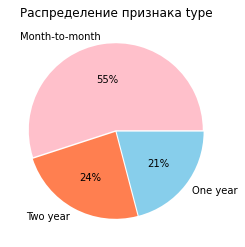

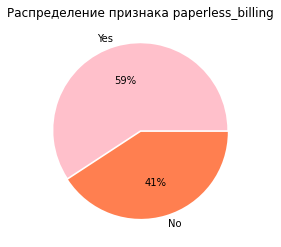

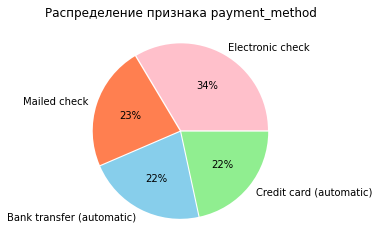

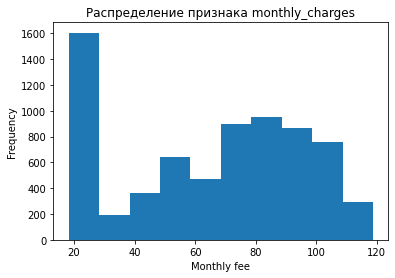

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


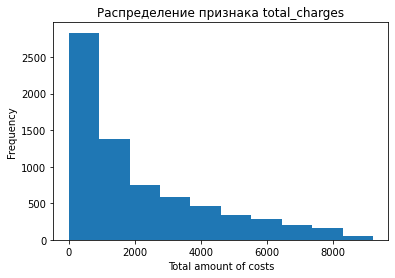

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64


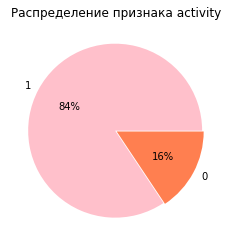

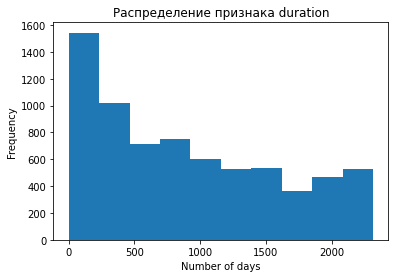

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration, dtype: float64


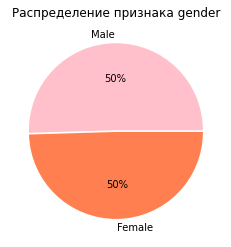

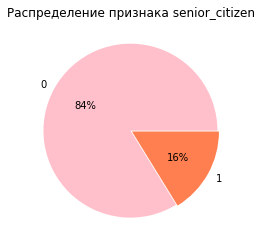

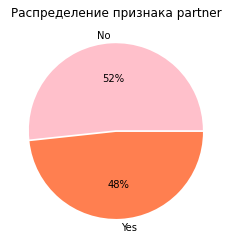

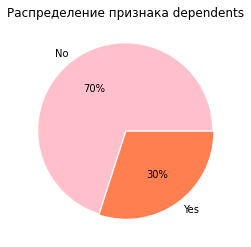

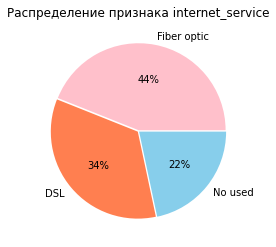

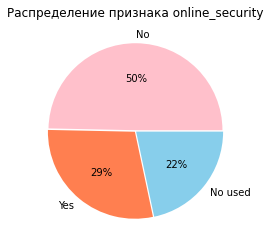

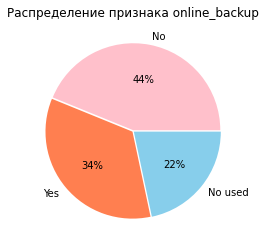

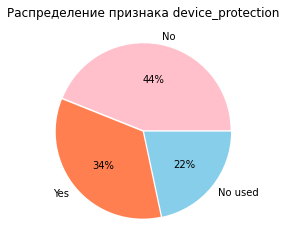

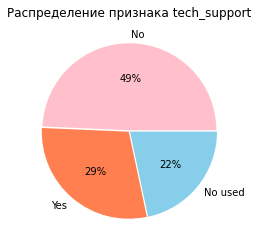

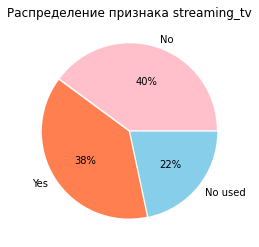

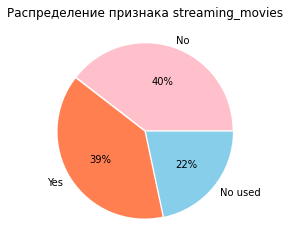

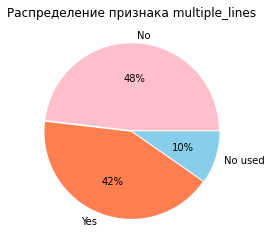

In [32]:
colors = ['pink', 'coral','skyblue', 'lightgreen'] 
explode = (0.01,)

for column in final_new.columns:
    if column in category_cols or column == 'activity':
        final_new[column].value_counts().plot(kind='pie',autopct='%1.0f%%', colors=colors[0:len(final_new[column].unique())], explode=(explode*len(final_new[column].unique())), title=f'Распределение признака {column}', label='')
        plt.show()
    if column in numeric_cols:
        final_new[column].plot(kind='hist')
        plt.title(f'Распределение признака {column}')
        if column == 'monthly_charges':
            plt.xlabel('Monthly fee')
        if column == 'total_charges':
            plt.xlabel('Total amount of costs')
        if column == 'duration':
            plt.xlabel('Number of days')
        plt.show()
        print(final_new[column].describe())    

### Вывод

Построив распределения всех признаков из объединенного датафрейма, мы можем сказать следующее:

- Чуть больше половины всех пользователей платят за услуги ежемесячно, а не раз в год или два;

- Почти 60% пользователей препочитают электронный расчетный лист;

- Самый популярный тип платежа - electronic check (34% пользователя пользуются таким);

- Присутствует явный дисбаланс класса активности пользоватей, так как видно явный "перекос" в сторону активности договора (84% пользователей на момент выгрузки данных не прерывали договор). Однако, балансировать данные мы не будем, так как метрика ROC-AUC не чувствительна к дисбалансу;

- Cоотношение мужчин и женщин, пользующихся услугами компании "ТелеДом" равное;

- Только 16% всех пользователей достигли пенсионного возраста;

- Примерно равное соотношение пользователей, которые женаты и не женаты (52% и 48% соответственно), при этом 70% абонентов не имеют детей;

- Большинство пользоватей, если пользуются услугами интернета у данной компании, предпочитают подключение через оптоволоконный кабель (44% абонентов);

- В основном, большинство людей, зарегистрированных в системе, не подключают услуги интернета в данной компании;

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

----
Также, что касается количественных признаков, делаем следующие выводы:

- Распределение этих признаков вовсе не похоже на нормальное, поэтому в будущем будем их нормализовывать для корректной работы модели

## Корреляционный анализ

Для того, чтобы понять, насколько сильная зависимость между целевым и входными признаками, будем использовать phik_matrix

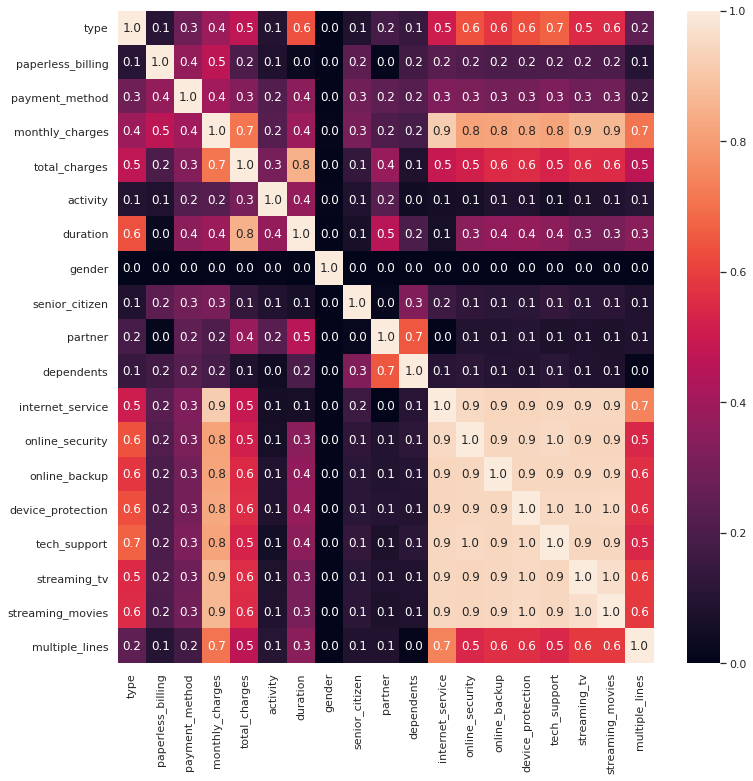

In [33]:
sns.set_theme(rc={'figure.figsize':(12,12)})
data_corr = final_new.drop('customer_id', axis=1)

sns.heatmap(data_corr.phik_matrix(interval_cols=numeric_cols), annot=True, fmt='.1f')
plt.show()

Видим, что между признаками присутствует мультиколлинеарность, которую не стоит оставлять.

Для дальнейшей работы с моделью оставим следующие признаки, которые имеют достаточную корреляцию с целевым признаком и имеют корреляцию менее 0.8 с другими признаками: ***type***, ***paperless_billing***, ***payment_method***, ***total_charges***, ***duration***, ***senior_citizen***, ***partner***, ***online_security***, ***tech_support***, ***multiple_lines***

In [34]:
final_columns = ['type', 'paperless_billing', 'payment_method', 'total_charges', 
                 'duration', 'senior_citizen', 'partner', 'online_security', 
                 'tech_support', 'multiple_lines', 'activity']
final = final_new[final_columns]
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   total_charges      7043 non-null   float64
 4   duration           7043 non-null   int64  
 5   senior_citizen     7043 non-null   int64  
 6   partner            7043 non-null   object 
 7   online_security    7043 non-null   object 
 8   tech_support       7043 non-null   object 
 9   multiple_lines     7043 non-null   object 
 10  activity           7043 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 660.3+ KB


Оставили в итоговом датафрейме только те столбцы, которые будут нужны для нашего анализа

<div class="alert alert-success">
<b>👍 Успех:</b> Набор признаков для обучения определен!
</div>

## Подготовка данных и обучение моделей

Переходим к подготовке данных и обучению моделей

In [35]:
RANDOM_STATE = 130125
TEST_SIZE = 0.25

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    final.drop('activity', axis=1),
    final['activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = final['activity']
)

In [37]:
ohe_columns = ['type', 'paperless_billing', 'payment_method', 
               'senior_citizen', 'partner', 'online_security', 
               'tech_support', 'multiple_lines']

ord_columns = ohe_columns

num_columns = ['duration', 'total_charges']

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Модель LogisticRegression

In [38]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

In [39]:
param_distributions = [
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [40]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель логистической регрессии и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации:', randomized_search.best_score_)

Лучшая модель логистической регрессии и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type', 'paperless_billing',
                                                   'payment_method',
                                                   'senior_citizen', 'partner',
                                                   'online_security',
                                                   'tech_support',
                                                   'multiple_lines']),
                                                 ('num', MinMaxScaler(),
                                                  ['duration',
                                                   't

Видим, что лучшая метрика моделей логистической регрессии при кросс-валидации 0.74. Пробуем на наших данных обучить модели DecisionTreeRegressor и LGBMClassifier, посмотрим на их метрики.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Для выбора лучшей модели используется метрика на кроссвалидации, тетсовые данные не используются в этом разделе (ниже тоже нужно исправить)</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо! Исправила! </div>

### Модели DecisionTreeRegressor и LGBMClassifier

In [41]:
data_preprocessor = ColumnTransformer(
    [
        ('ord', OrdinalEncoder(), ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [42]:
param_distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,7),
        'models__max_features': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [lgb(random_state=RANDOM_STATE)],
        'models__learning_rate': [0.1, 0.2],
        'models__subsample_for_bin': [10000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [43]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1, 
    random_state=RANDOM_STATE
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации:', randomized_search.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_prob

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord', OrdinalEncoder(),
                                                  ['type', 'paperless_billing',
                                                   'payment_method',
                                                   'senior_citizen', 'partner',
                                                   'online_security',
                                                   'tech_support',
                                                   'multiple_lines']),
                                                 ('num', MinMaxScaler(),
                                                  ['duration',
                                                   'total_charges'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.2, random_state=130125,
                                subsample_for_bin=10000

В данном переборе моделей и гиперпараметров мы увидели, что при кросс-валидации лучшая модель показывает метрику 0.88, что явно больше метрики, полученной у логистической регрессии, и больше 0.85.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь нужно сравнить метрики всех моделей, выбрать лучшую и после этого проверить ее на тестовых данных</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> При переборе всех моделей и сравнения с помощью randomized_search.best_estimator_ вывожу лучшие модели по метрикам для наших моделей. Лучшая метрика для логистической регрессии - 0.74, лучшая для остальных двух - 0.88. Следовательно, выбираем ту модель, которая показала лучший результат </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Проверка модели на тестовых данных

**Лучшая модель**: LGBMClassifier (learning_rate=0.2, random_state=130125, subsample_for_bin=10000))].
При кросс-валидации метрика ROC_AUC равна 0.88 > 0.85.

Именно этой модели передадим наши тестовые данные и посмотрим на метрику ROC-AUC

In [44]:
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:,1])}')

Метрика ROC-AUC на тестовой выборке: 0.9102642848403278


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Метрика ROC_AUC на тестовой выборке равна 0.91, еще выше, чем при кросс-валидации

<div class="alert alert-success">
<b>👍 Успех:</b> Получилась отличная метрика!
</div>

### ROC-кривая лучшей модели

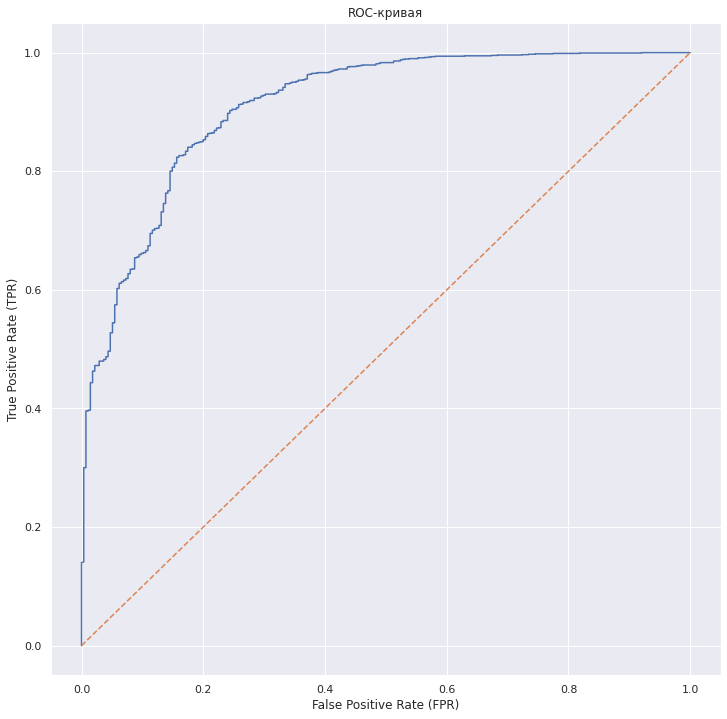

In [45]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction')

plt.title("ROC-кривая")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

ROC-кривая сильно выпукла вверх (лежит явно выше, чем отрезок предсказаний случайной модели), следовательно в большинстве случаев модель делает верные предсказания (площадь под графиков ROC-кривой 0.91)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Метрика accuracy

In [46]:
print('Метрика accuracy:', accuracy_score(y_test, randomized_search.predict(X_test)))

Метрика accuracy: 0.909710391822828


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Посчитав метрику accuracy, можем сказать, что в почти в 91% случаев наша модель верно предсказывает результат.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Матрица ошибок

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


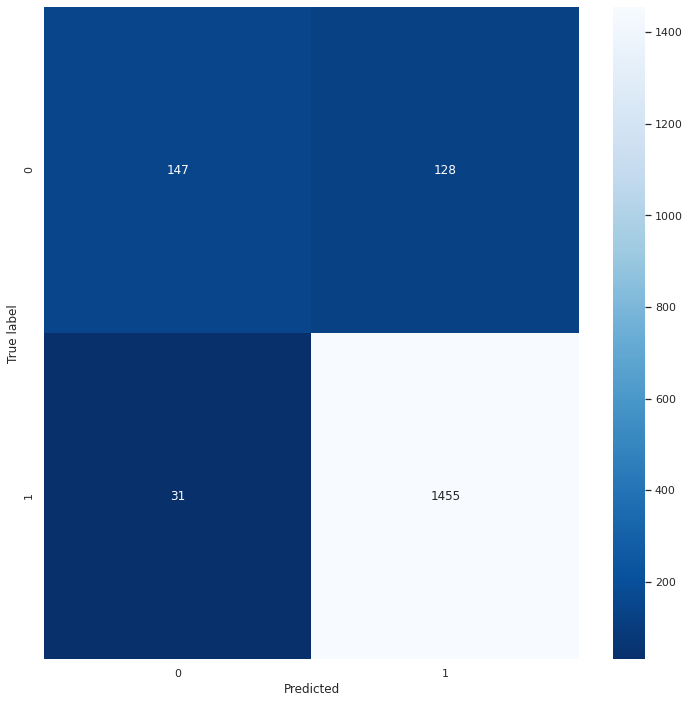

In [47]:
cm = confusion_matrix(y_test, randomized_search.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Как мы можем заметить по матрице ошибок, модель в большинстве случаев (примерно 98%) абсолютно правильно предсказывает класс 1 - активность договора. Этот класс как раз и является преобладающих в данных.

Однако, примерно в половине случаев модель ошибается в предсказании того, что пользователь рассторгнул договор.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Анализ важности признаков

In [48]:
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
lgbclf = randomized_search.best_estimator_.named_steps['models']

pd.DataFrame(lgbclf.booster_.feature_importance(), 
    index=randomized_search.best_estimator_[:-1].get_feature_names_out(),
    columns=['Важность признаков']).sort_values(by='Важность признаков', ascending=False)

Важность признаков
num__duration                         1399
num__total_charges                     884
ord__payment_method                    162
ord__type                              124
ord__multiple_lines                     96
ord__partner                            78
ord__paperless_billing                  74
ord__online_security                    71
ord__tech_support                       71
ord__senior_citizen                     41

Проведя анализ важности признаков, можем сказать, что самый значимый показатель, который влияет на активность договора, - его длительность. Также весомую значимость имеет показатель количества всех потраченных на услуги денег.

Самый незначимый для модели признак - статус пенсионера.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Проверка модели на адекватность

Проверим модель на адекватность с помощью DummyClassifier

In [49]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy_model_preds = dummy.predict_proba(X_test)[:, 1]

dummy_roc = roc_auc_score(y_test, dummy_model_preds)
print('Model roc_auc =', round(dummy_roc, 2))

Model roc_auc = 0.5


Как видим, в данном случае метрика модели упала до 0.5. Следовательно, наша выбранная модель вполне адекватна и все-таки работает успешно.

## Общий вывод

Таким образом, цель нашего проекта выполнена. Метрика ROC-AUC на выбранной модели показала результат 0.88 при кросс-валидации и 0.91 на тестовой выборке.

-----
Для достижения результата мы:

- Загрузили все необходимые библиотеки и данные;

- Провели предобработку всех датафреймов: привели названия столбцов к змеиному регистру, поменяли тип данных, проверили на наличие дубликатов и пропусков, добавили новые и более значимые для анализа, признаки;

- Объединили все данные в один датафрейм;

- Провели исследовательский анализ объединенного датафрейма, посмотрели на расспределение каждого признака;

- Провели корреляционный анализ, увидели мультиколлинеарность и оставили для дальнейшей работы с моделью в датафрейме следующие признаки: ***type***, ***paperless_billing***, ***payment_method***, ***total_charges***, ***duration***, ***senior_citizen***, ***partner***, ***online_security***, ***tech_support***, ***multiple_lines***;

- Подготовили данные к обучению моделей;

- Обучили три модели: **LogisticRegression**, **DecisionTreeClassifier** и **LGBMClassifier**,- перебирая гиперпараметры для каждой.

----
Лучшей моделью оказалась **LGBMClassifier** с гиперпараметрами **learning_rate = 0.2, random_state = 130125, subsample_for_bin = 10000**. 

Лучшую модель мы проверили на адекватность, посчитали метрику accuracy, разобрали матрицу ошибок и провели анализ важности признаков.


## Рекомендации заказчику

1) Хотелось бы обратить внимание на то, что далеко не все данные, которые предоставлены в датафреймах, оказались важны для использования моделей машинного обучения: 

- Например, факт активности договора и длительность намного важнее для моделей нежели даты заключения и расторжения договора;

- Также, все признаки в датафрейме ***internet_new*** сильно коррелируют друг с другом, поэтому все вместе они не могут быть полезны для моделей.

2) Некоторые типы в данных были указаны неправильно (например, ***total_charges*** или ***begin_date***). Возможно, при выгрузке данных нужно более тщательно обращать на это внимание.

<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, финальный проект завершен! Сама работа получилась хорошей и структурированной, были предобработаны и проанализированы данные, выбран целевой признак, рассчеты подкреплены визуализацией, это очень важная часть работы, которая облегчает анализ и позволяет полнее представлять происходящее в данных. Построено и обучено несколько моделей, все они оценены и выбрана лучшая. Цель работы достигнута, получена модель хорошо предсказывающая уход клиентов. Не забывай о том, что все пункты очень важны и каждому стоит уделять максимум внимания. <p>
С опытом становится значительно легче, но опыт это не только повторение однажды изученного, но и постоянное развитие, тем более, что ты выбрала очень динамично развивающуюся область. <p>
В будущей профессии тебе точно пригодиться умение системно подходить к решению аналитических задач, здесь рекомендую изучить ТРИЗ и системный анализ, из литературы можно почитать Теоретический минимум по Big Data — Су Кеннет и Ын Анналин, Практическая статистика для специалистов Data Science — Брюс П. и Брюс Э., Real-World Machine Learning — Henric Brink, Joseph Мark, W. Richards Fetherolf, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow — Жерон Орельен.<p>
Есть интересные сообщества (например https://vk.com/mashinnoe_obuchenie_ai_big_data) и конечно же https://habr.com/ru/all/<p>

Дополнительно предлагаю посмотреть:
- Книга от ШАД: https://academy.yandex.ru/handbook/ml

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/

 Удачи тебе и профессионального роста!
</div>